In [87]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [88]:
df_DE_UK = df[(df['job_location'] == 'United Kingdom') & (df['job_title_short'] == 'Data Engineer')].copy()


In [89]:
df_DE_UK['job_posted_month_no'] = df_DE_UK['job_posted_date'].dt.month

In [90]:
df_DE_UK_explpde = df_DE_UK.explode('job_skills')

In [91]:
df_DE_UK_pivot = df_DE_UK_explpde.pivot_table(index = 'job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value=0)

df_DE_UK_pivot.loc['Total'] = df_DE_UK_pivot.sum()

sorted_cols = df_DE_UK_pivot.loc['Total'].sort_values(ascending=False).index

df_DE_UK_pivot = df_DE_UK_pivot[sorted_cols]

df_DE_UK_pivot = df_DE_UK_pivot.drop('Total')

In [92]:
DE_totals = df_DE_UK.groupby('job_posted_month_no').size()

In [93]:
df_DE_UK_perc = df_DE_UK_pivot.div(DE_totals/100, axis=0)

df_DE_UK_perc


job_skills,sql,python,azure,aws,spark,databricks,java,power bi,gcp,snowflake,...,slack,npm,node.js,node,spss,airtable,assembly,sqlite,asp.net,clickup
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,71.276596,58.510638,56.382979,32.978723,23.404255,15.957447,17.021277,13.829787,18.085106,7.446809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.06383,0.000000,0.000000
2,74.576271,57.627119,54.237288,32.203390,28.813559,13.559322,10.169492,13.559322,18.644068,22.033898,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,66.037736,60.377358,41.509434,35.849057,13.207547,15.094340,18.867925,18.867925,9.433962,5.660377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,46.296296,53.703704,27.777778,40.740741,11.111111,11.111111,14.814815,1.851852,12.962963,12.962963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,59.259259,46.296296,50.000000,14.814815,5.555556,12.962963,14.814815,16.666667,5.555556,3.703704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,62.500000,60.714286,46.428571,30.357143,16.071429,12.500000,10.714286,26.785714,8.928571,12.500000,...,0.000000,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,68.333333,51.666667,53.333333,36.666667,20.000000,13.333333,11.666667,25.000000,16.666667,23.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,71.153846,51.923077,46.153846,26.923077,13.461538,21.153846,3.846154,13.461538,11.538462,17.307692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,58.598726,47.770701,36.305732,28.662420,19.108280,12.101911,15.923567,10.828025,12.738854,8.917197,...,0.636943,0.636943,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.636943


In [94]:
df_DE_UK_perc = df_DE_UK_perc.reset_index()
df_DE_UK_perc['job_posted_month'] = df_DE_UK_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DE_UK_perc = df_DE_UK_perc.set_index('job_posted_month')
df_DE_UK_perc = df_DE_UK_perc.drop(columns='job_posted_month_no')
df_DE_UK_perc

job_skills,sql,python,azure,aws,spark,databricks,java,power bi,gcp,snowflake,...,slack,npm,node.js,node,spss,airtable,assembly,sqlite,asp.net,clickup
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,71.276596,58.510638,56.382979,32.978723,23.404255,15.957447,17.021277,13.829787,18.085106,7.446809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.06383,0.000000,0.000000
Feb,74.576271,57.627119,54.237288,32.203390,28.813559,13.559322,10.169492,13.559322,18.644068,22.033898,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Mar,66.037736,60.377358,41.509434,35.849057,13.207547,15.094340,18.867925,18.867925,9.433962,5.660377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Apr,46.296296,53.703704,27.777778,40.740741,11.111111,11.111111,14.814815,1.851852,12.962963,12.962963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
May,59.259259,46.296296,50.000000,14.814815,5.555556,12.962963,14.814815,16.666667,5.555556,3.703704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jun,62.500000,60.714286,46.428571,30.357143,16.071429,12.500000,10.714286,26.785714,8.928571,12.500000,...,0.000000,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jul,68.333333,51.666667,53.333333,36.666667,20.000000,13.333333,11.666667,25.000000,16.666667,23.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Aug,71.153846,51.923077,46.153846,26.923077,13.461538,21.153846,3.846154,13.461538,11.538462,17.307692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Sep,58.598726,47.770701,36.305732,28.662420,19.108280,12.101911,15.923567,10.828025,12.738854,8.917197,...,0.636943,0.636943,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.636943


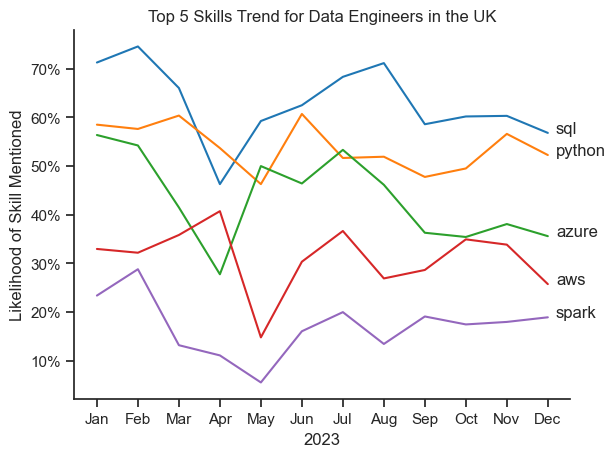

In [99]:
df_plot = df_DE_UK_perc.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False,palette="tab10")
sns.set_theme(style="ticks")
sns.despine()


plt.title('Top 5 Skills Trend for Data Engineers in the UK')
plt.xlabel('2023')
plt.ylabel('Likelihood of Skill Mentioned')
plt.legend().remove()


ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])